# Andere Visualisierungen

Bisher haben wir uns Visualisierung von Funktionen bzw. Funktionsdaten angesehen. Es gibt jedoch auch eine Reihe  anderer Daten und ihrer Visualisierung.


## Statistische Daten

Stastische Daten sind Daten mit Fehlern oder mit Wahrscheinlichkeiten. Damit kann man dann z.B. Fehlerplots oder Histogramme erstellen.

### Fehlerplots (errorbar)

Hat man Werte zusammen mit ihren Fehlerwerten, kann man errorbar benutzen

``` python
plt.errorbar(x,y, [xerr], [yerr])
```

- `xerr`: Fehler für x, kann ein Wert oder ein Array gleicher Größe wie x sein.
- `yerr`: Fehler für y, kann ein Wert oder ein Array gleicher Größe wie y sein.


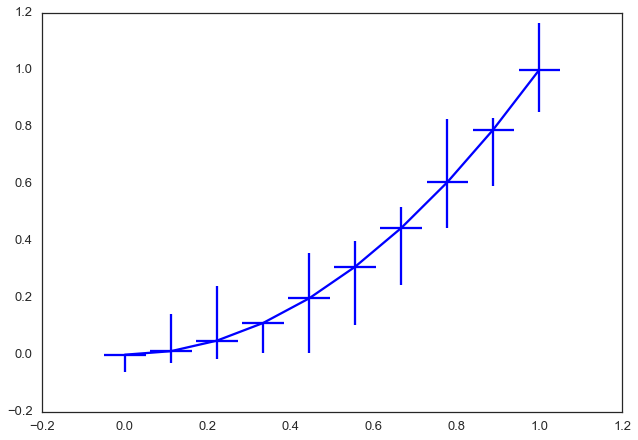

In [1]:
from numpy.random import random
from numpy import linspace
import matplotlib.pyplot as plt

plt.style.use('seaborn-talk')

N = 10
yerr = random((2,N))/4

x = linspace(0,1,N)
y = x**2 

plt.errorbar(x, y, xerr=0.05, yerr=yerr)
plt.show()

#### Fehlerplots (fill_between)

Eine schöne Möglichkeit Fehler darzustellen, falls man nur welche in $y$ hat ist die Funktion

``` python
plt.fill_between(x,y1,y2)
```
welche die Fläche zwischen y1 und y2 ausfüllt.


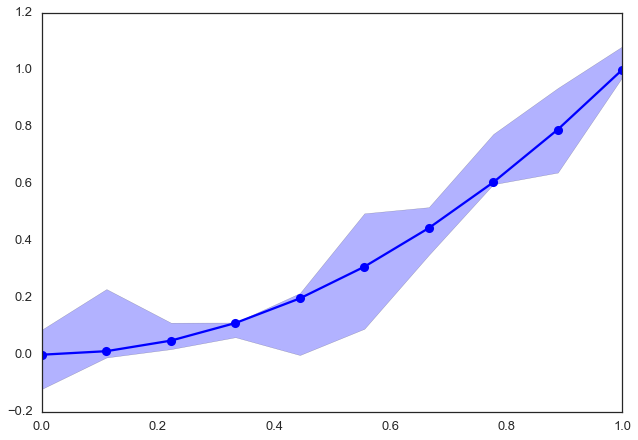

In [1]:
N = 10
yerr = random((2,N))/4

x = linspace(0,1,N)
y = x**2 

plt.plot(x,y,'o-')
plt.fill_between(x, y-yerr[0], y+yerr[1], alpha=0.3)
plt.show()

### Fehlerplots (violin/box)

einfach Fehlerplots (boxplots) stellen für gegebene (statistisch) verteilte Punkte den Mittelwert, die signifikante Box sowie den Fehlerbalken dar. 

```python
matplotlib.pyplot.boxplot(data, options)
```

wohingegen violin plots die gesamte Breite der Daten mittels integrierter Funktionen auf beiden Seiten darstellt.

```python
matplotlib.pyplot.violinplot(data, options)
```

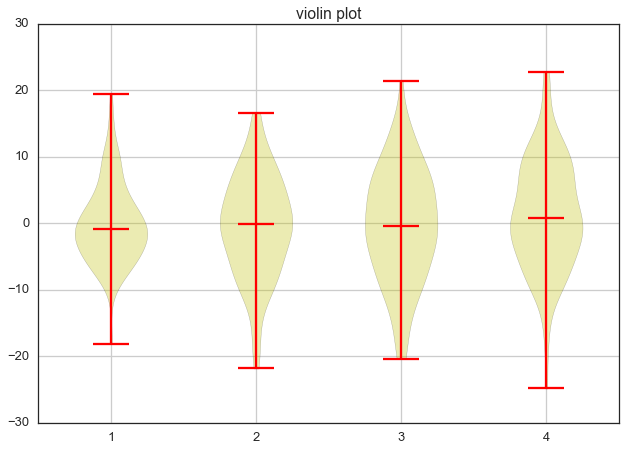

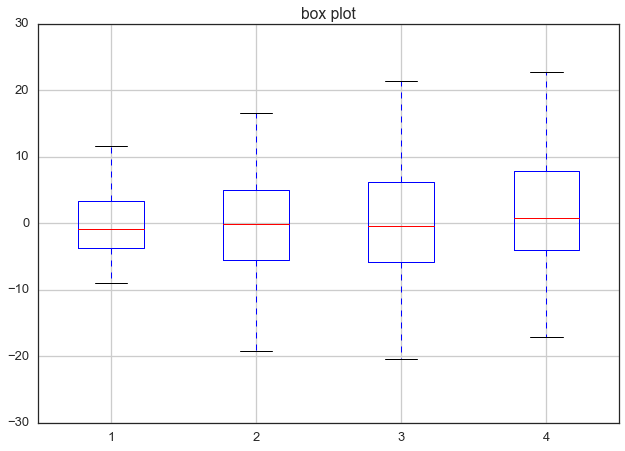

In [1]:
import matplotlib.pyplot as plt
from numpy import random

plt.style.use('seaborn-talk')

# Beispieldaten mit normalverteiltem Fehler
data = [random.normal(0, std, 100) for std in range(6, 10)]

# violin plot
plt.figure()
plt.violinplot(data, showmeans=False, showmedians=True)
plt.title('violin plot')
plt.grid(True)
plt.xticks([y+1 for y in range(len(data))])

# box plot
plt.figure()
plt.boxplot(data)
plt.title('box plot')
plt.grid(True)
plt.xticks([y+1 for y in range(len(data))])

plt.show()

### Histogramme

sind Balkendiagramme. Prinzipiell sehr ähnlich zu den x-y-Plots.

``` python
matplotlib.pyplot.hist(data, options)
```


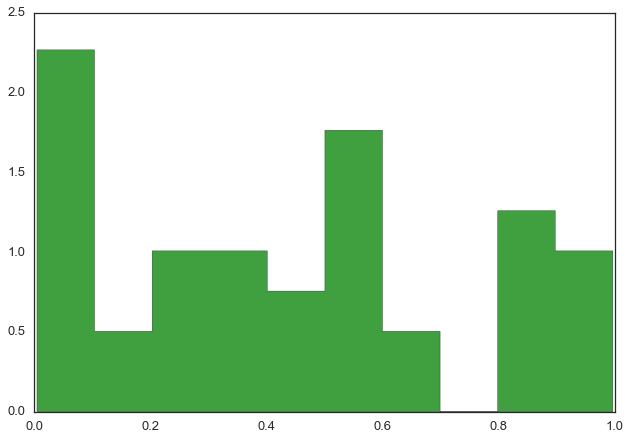

In [1]:
from scipy import rand
import matplotlib.pyplot as plt

n = 40
data = rand(n,1)
plt.hist(data, bins=10, normed=1, histtype='stepfilled', facecolor='g', alpha=0.75)
None

### Geometrische Formen (Polygone)

Visualisierungen von geometrischen Objekten mittels *Polygone* also geschlossene Kurven über eine Punktmenge. Im Sinne der Darstellung brauchen wir dafür nur die bereits bekannte Funktion 


``` python
plt.plot(x,y)
```

weil sie einfach gegebene Punkte hintereinander verbindet. 

### Ausgefüllte Polygone

Ähnlich wie plot verbindet `fill` die Punkte mit Linien, verbindet dann zusätzlich aber den letzten punkt mit dem ersten und erhält damit eine geschlossen Kurve, die dann ausgefüllt wird.

``` python
plt.fill(x,y)
```

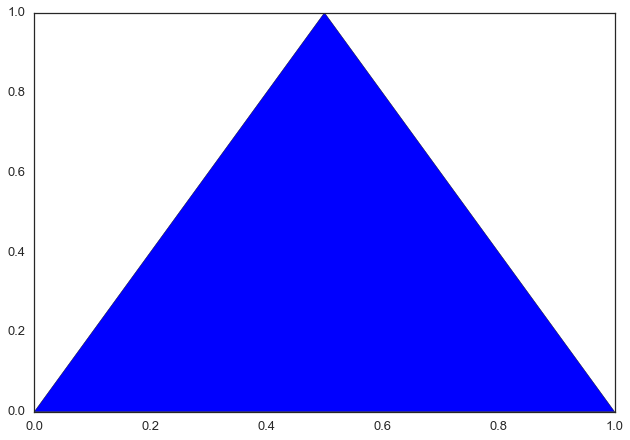

In [1]:
x=[0,1,0.5]
y=[0,0,1]

plt.fill(x,y)
plt.show()

**Beispiel: Sierpinski Dreieck**
- Wir beginnen mit einem Dreieck mit Eckpunkten $P_a$, $P_b$ und $P_c$. 
- Wir entfernen daraus das Dreieck, das durch die Mittelpunkte der
  Kanten entsteht.
- Die verbliebenden drei Dreiecke werden der gleichen Prozedur
  unterzogen.
- Diesen Prozess können wir rekursiv wiederholen.
- Das Ergebnis ist das Sierpinski Dreieck.

Ein Polygon sei durch die Eckpunkte $(x_i,y_i)_{i=1}^n$ gegeben. Dann
kann durch den Befehl
```python
matplotlib.pyplot.fill(x,y,char)
```
dargestellt werden. ```char``` gibt die Farbe des Polygons an, z.B. rot
wäre ```'r'```.

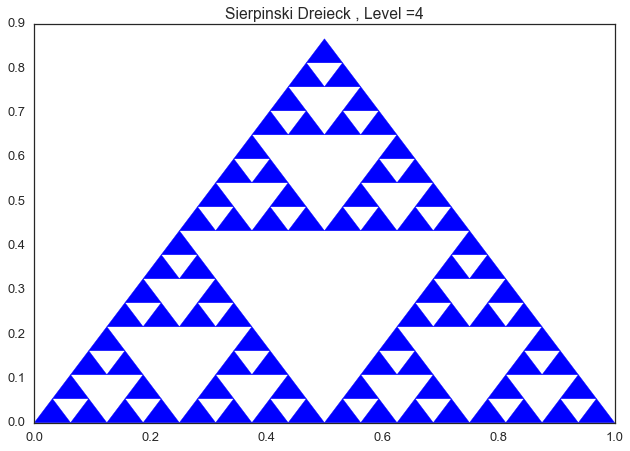

In [1]:
from numpy import array, sqrt
from itertools import chain
import matplotlib.pyplot as plt  

def sierpinski(ecke1,ecke2,ecke3,level):
    """Teilt ein Dreieck auf in 3 Dreiecke (level >0) 
    
    Parameters
    ----------
    ecke1: 2d array
        erste Ecke
    ecke2: 2d array
        zweiter Ecke
    ecke3: 2d array
        dritte Ecke
    level: int
        zu bearbeitende Levels
    
    Returns
    -------
    list:
        alle Punkte eines Dreiecks
    """
    liste = []
    if level == 0:
        return ([ecke1[0],ecke2[0],ecke3[0]],[ecke1[1],ecke2[1],ecke3[1]])
    else:
        ecke12 = (ecke1+ecke2)/2
        ecke13 = (ecke1+ecke3)/2
        ecke23 = (ecke2+ecke3)/2
        liste.append( sierpinski(ecke1, ecke12, ecke13, level-1) )
        liste.append( sierpinski(ecke12, ecke2, ecke23, level-1) )
        liste.append( sierpinski(ecke13, ecke23, ecke3, level-1) )
        return chain(*liste)
        
level = 4
ecke1 = array([0,0])
ecke2 = array([1,0])
ecke3 = array([0.5, sqrt(3)/2])

tripoints = sierpinski (ecke1 ,ecke2 ,ecke3 , level)

plt.figure()
plt.fill(*tripoints, color='b')
plt.title ('Sierpinski Dreieck , Level ={}'.format(level))
plt.show()